# XG325: Explainable Artificial Intelligence
    
## Minimal Solution

**Week 04 | Lecture 02**

_Saturday, March 29, 2025_

Presented by Dr. Marcin Abram

In [1]:
import numpy
import pandas
import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.svm
import pandas.plotting

numpy.set_printoptions(suppress=True)
numpy.set_printoptions(threshold=10)

import matplotlib.pyplot as plt
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual

### Load and Explore the Dataset

In [2]:
# Load dataset
data = pandas.read_csv('./used_car_dataset.csv')
data

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,type,paint_color,F1,F2,F3,F4
0,21978.0,2016.0,ford,like new,6 cylinders,gas,80813.0,automatic,SUV,black,138,2.472286,0.059031,b
1,4185.0,2008.0,ford,good,8 cylinders,gas,201800.0,automatic,SUV,white,415,2.285245,0.046328,c
2,7693.0,2002.0,ford,excellent,6 cylinders,gas,145000.0,automatic,pickup,white,535,1.861461,0.158554,b
3,15778.0,2016.0,ford,excellent,4 cylinders,gas,50103.0,automatic,sedan,white,3435,2.331671,0.213665,c
4,10520.0,2005.0,ford,good,8 cylinders,gas,207663.0,automatic,truck,white,1212,2.061082,0.388724,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,4020.0,2007.0,ford,excellent,4 cylinders,gas,133000.0,automatic,sedan,red,46,2.212302,0.006381,b
9993,9960.0,2004.0,ford,excellent,6 cylinders,gas,104392.0,automatic,pickup,silver,1539,2.075114,0.245105,c
9994,45754.0,2016.0,ford,excellent,6 cylinders,gas,57387.0,automatic,truck,white,1871,2.174796,0.145092,c
9995,20599.0,2017.0,ford,excellent,4 cylinders,gas,31381.0,automatic,SUV,silver,1686,2.214853,-0.007579,b


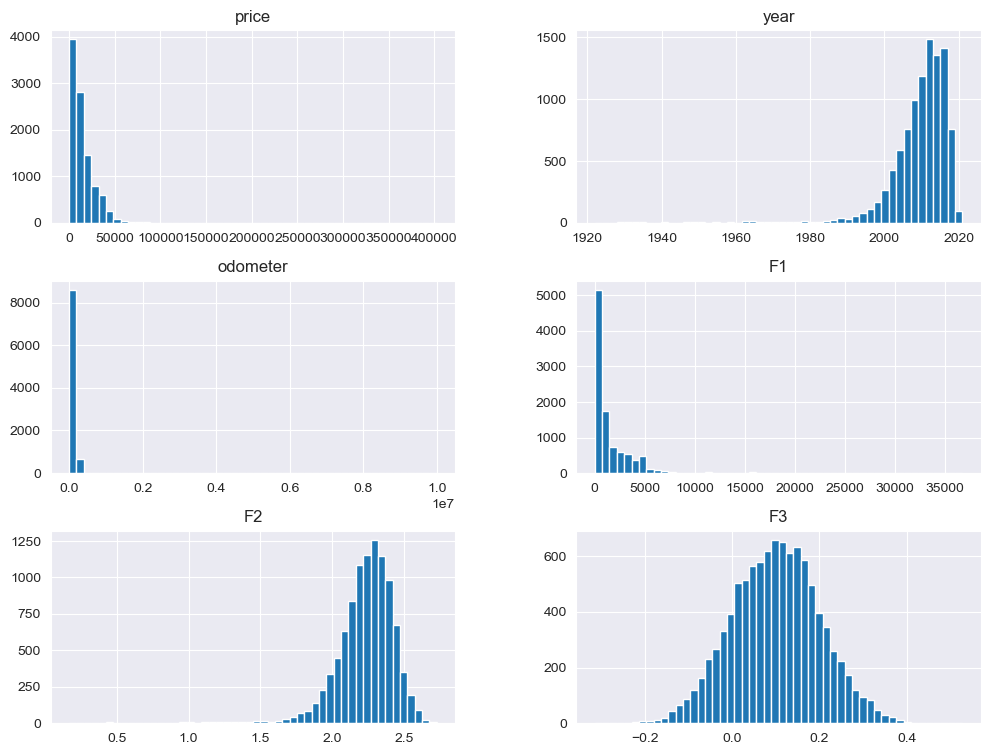

In [3]:
# Plot histobrams
data.hist(bins=50, figsize=(12, 9)); plt.show()

In [4]:
# Count objects
data["fuel"].value_counts()

fuel
gas    9997
Name: count, dtype: int64

In [5]:
# Create random indices
numpy.random.seed(44)
N = len(data)
shuffled_indices = numpy.random.permutation(N)

# Split indices into train, validation and test sets
train_indices = shuffled_indices[:int(N*0.6)]
valid_indices = shuffled_indices[int(N*0.6):int(N*0.8)]
test_indices = shuffled_indices[int(N*0.8):]

#  Split data into train, validation and test sets
train_set = data.iloc[train_indices]
valid_set = data.iloc[valid_indices]
test_set = data.iloc[test_indices]

train_set.shape, valid_set.shape, test_set.shape

((5998, 14), (1999, 14), (2000, 14))

In [6]:
# Check correlations between variables
corr_matrix = train_set.corr()
corr_matrix

ValueError: could not convert string to float: 'ford'

In [ ]:
# Display correlation plots
attributes = ["price", "year", "F1", "F2", 'F3']
pandas.plotting.scatter_matrix(train_set[attributes], figsize=(12, 8), hist_kwds={'bins': 50})
plt.show()

### Preprocessing

In [ ]:
def transform(input_data, dependent_variable_name, cathegorical_variable_names):
    """Define the full preprocessing pipline."""
    # Drop NA
    transformed = input_data.dropna()
    
    # Drop fuel
    transformed = transformed.drop(columns='fuel')
    
    # Drop unrealistic odometer
    transformed = transformed[transformed.odometer < 3*10**6]
    
    # Drop unrealistic price
    transformed = transformed[transformed.price > 0]

    # Select the dependent variable
    dependent = transformed[dependent_variable_name].copy()
    
    # Select the independent variables
    independent = transformed.drop(dependent_variable_name, axis=1)

    # Encode the cathegorical variable as one hot vectors
    ordinal_encoder = sklearn.preprocessing.OrdinalEncoder()
    encoded = ordinal_encoder.fit_transform(independent[cathegorical_variable_names])
    onehot_encoder = sklearn.preprocessing.OneHotEncoder()
    one_hot = onehot_encoder.fit_transform(independent[cathegorical_variable_names]).toarray()
        
    # Replace the cathegorical variables by the one hot vectors
    independent = independent.drop(cathegorical_variable_names, axis=1)
    width = one_hot.shape[-1]
    onehot_names = [f'c{i}' for i in range(width)]
    independent[onehot_names] = one_hot
    
    return independent, dependent

In [ ]:
# Transform the training data
train_x, train_y = transform(
    train_set,
    dependent_variable_name='price',
    cathegorical_variable_names=[
        "manufacturer", 'condition', 'cylinders', 'transmission', 'type', 'paint_color', 'F4']
)

train_x

In [ ]:
# Transform the validation data
valid_x, valid_y = transform(
    valid_set,
    dependent_variable_name='price',
    cathegorical_variable_names=[
        "manufacturer", 'condition', 'cylinders', 'transmission', 'type', 'paint_color', 'F4']
)

valid_x.shape, valid_y.shape

In [ ]:
# Transform the test data
test_x, test_y = transform(
    test_set,
    dependent_variable_name='price',
    cathegorical_variable_names=[
        "manufacturer", 'condition', 'cylinders', 'transmission', 'type', 'paint_color', 'F4']
)

test_x.shape, test_y.shape

### Training

In [ ]:
# Define and fit a linear regression model
reg1 = sklearn.linear_model.LinearRegression()
reg1.fit(train_x, train_y)

# Check the L2 distance
numpy.sqrt(sklearn.metrics.mean_squared_error(reg1.predict(valid_x), valid_y))

In [ ]:
reg1.coef_[:5]

### Fine Tuning

In [ ]:
reg2 = sklearn.linear_model.Lasso(alpha=20)
reg2.fit(train_x, train_y)

# Check the performance
numpy.sqrt(sklearn.metrics.mean_squared_error(reg2.predict(valid_x), valid_y))

In [ ]:
reg2.coef_[:5]

In [ ]:
reg3 = sklearn.linear_model.Lasso(alpha=20)
reg3.fit(train_x, train_y)

# Check the performance
numpy.sqrt(sklearn.metrics.mean_squared_error(reg3.predict(valid_x), valid_y))

In [ ]:
reg3.coef_[:5]

In [ ]:
train_set

In [ ]:
def transform(input_data, dependent_variable_name, cathegorical_variable_names):
    """Define the full preprocessing pipline."""
    # Deal with NA
    transformed = input_data.copy()
    transformed['odometer'] = transformed['odometer'].fillna(train_set.odometer.mean())
    
    # Drop fuel
    transformed = transformed.drop(columns='fuel')
    
    # Drop F2
    transformed = transformed.drop(columns='F2')
    
    # Drop unrealistic odometer
    transformed = transformed[transformed.odometer < 3*10**6]
    
    # Drop unrealistic price
    transformed = transformed[transformed.price > 0]

    # Select the dependent variable
    dependent = transformed[dependent_variable_name].copy()
    
    # Select the independent variables
    independent = transformed.drop(dependent_variable_name, axis=1)

    # Feature Engineering
    independent['year2'] = (2021 - independent['year'])**2
    independent['year3'] = (2021 - independent['year'])**3
    independent['odometer2'] = (independent['odometer']/10**5)**2
    
    # Encode the cathegorical variable as one hot vectors
    ordinal_encoder = sklearn.preprocessing.OrdinalEncoder()
    encoded = ordinal_encoder.fit_transform(independent[cathegorical_variable_names])
    onehot_encoder = sklearn.preprocessing.OneHotEncoder()
    one_hot = onehot_encoder.fit_transform(independent[cathegorical_variable_names]).toarray()
        
    # Replace the cathegorical variables by the one hot vectors
    independent = independent.drop(cathegorical_variable_names, axis=1)
    width = one_hot.shape[-1]
    onehot_names = [f'c{i}' for i in range(width)]
    independent[onehot_names] = one_hot
    
    return independent, dependent

In [ ]:
# Transform the training data
train_x, train_y = transform(
    train_set,
    dependent_variable_name='price',
    cathegorical_variable_names=[
        'cylinders', "manufacturer", 'condition', 'transmission', 'type', 'paint_color', 'F4']
)

valid_x, valid_y = transform(
    valid_set,
    dependent_variable_name='price',
    cathegorical_variable_names=[
        'cylinders', "manufacturer", 'condition', 'transmission', 'type', 'paint_color', 'F4']
)

test_x, test_y = transform(
    test_set,
    dependent_variable_name='price',
    cathegorical_variable_names=[
        'cylinders', "manufacturer", 'condition', 'transmission', 'type', 'paint_color', 'F4']
)

train_x

In [ ]:
reg4 = sklearn.linear_model.Ridge(alpha=10)
reg4.fit(train_x, train_y)

# Check the performance
numpy.sqrt(sklearn.metrics.mean_squared_error(reg4.predict(valid_x), valid_y))

In [ ]:
reg4.coef_[:10]

In [ ]:
def transform(input_data, dependent_variable_name, cathegorical_variable_names):
    """Define the full preprocessing pipline."""
    # Deal with NA
    transformed = input_data.copy()
    transformed['odometer'] = transformed['odometer'].fillna(train_set.odometer.mean())
    
    # Drop fuel
    transformed = transformed.drop(columns='fuel')
    
    # Drop F2
    transformed = transformed.drop(columns='F2')
    
    # Drop unrealistic odometer
    transformed = transformed[transformed.odometer < 3*10**6]
    
    # Drop unrealistic price
    transformed = transformed[transformed.price > 0]

    # Select the dependent variable
    dependent = transformed[dependent_variable_name].copy()
    
    # Select the independent variables
    independent = transformed.drop(dependent_variable_name, axis=1)

    # Feature Engineering
    independent['year2'] = (2021 - independent['year'])**2
    independent['year3'] = (2021 - independent['year'])**3
    independent['odometer2'] = (independent['odometer']/10**5)**2
    
    # test
    mapping = {'4 cylinders': 4, '6 cylinders': 6, '8 cylinders': 8}
    independent['cylinders'] = [mapping[c] for c in independent['cylinders']]
    
    # Encode the cathegorical variable as one hot vectors
    ordinal_encoder = sklearn.preprocessing.OrdinalEncoder()
    encoded = ordinal_encoder.fit_transform(independent[cathegorical_variable_names])
    onehot_encoder = sklearn.preprocessing.OneHotEncoder()
    one_hot = onehot_encoder.fit_transform(independent[cathegorical_variable_names]).toarray()
        
    # Replace the cathegorical variables by the one hot vectors
    independent = independent.drop(cathegorical_variable_names, axis=1)
    width = one_hot.shape[-1]
    onehot_names = [f'c{i}' for i in range(width)]
    independent[onehot_names] = one_hot
    
    return independent, dependent

In [ ]:
# Transform the training data
train_x, train_y = transform(
    train_set,
    dependent_variable_name='price',
    cathegorical_variable_names=[
        "manufacturer", 'condition', 'transmission', 'type', 'paint_color', 'F4']
)

valid_x, valid_y = transform(
    valid_set,
    dependent_variable_name='price',
    cathegorical_variable_names=[
        "manufacturer", 'condition', 'transmission', 'type', 'paint_color', 'F4']
)

test_x, test_y = transform(
    test_set,
    dependent_variable_name='price',
    cathegorical_variable_names=[
        "manufacturer", 'condition', 'transmission', 'type', 'paint_color', 'F4']
)

train_x

In [ ]:
reg4 = sklearn.linear_model.Ridge(alpha=10)
reg4.fit(train_x, train_y)

# Check the performance
numpy.sqrt(sklearn.metrics.mean_squared_error(reg4.predict(valid_x), valid_y))

In [ ]:
reg4.coef_[:10]

In [ ]:
sklearn.metrics.mean_absolute_error(reg4.predict(valid_x), valid_y)

In [ ]:
data[(data.price > 0) & (data.price < 100_000)].groupby('cylinders').mean()

### Training for real

In [ ]:
train_an_valid_x = pandas.concat([train_x, valid_x])
train_an_valid_y = pandas.concat([train_y, valid_y])

train_an_valid_x.shape, train_an_valid_y.shape

In [ ]:
reg = sklearn.linear_model.Ridge(alpha=10.0)
reg.fit(train_an_valid_x, train_an_valid_y)

# Check the performance
numpy.sqrt(sklearn.metrics.mean_squared_error(reg.predict(test_x), test_y))

In [ ]:
sklearn.metrics.mean_absolute_error(reg.predict(test_x), test_y)